<a href="https://colab.research.google.com/github/gadm21/AI/blob/master/AUV/happyNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import cv2 
import numpy as np
from skimage.util import random_noise
from skimage import feature 
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import os 
import imutils 
from google.colab.patches import cv2_imshow

import torch

# Functions

In [52]:
#show many images 
def show_images(images, labels = None):
  plt.figure(figsize=(30,20))
  columns = 4
  for i, image in enumerate(images):
      if isinstance(image, str): image = read_image(image)
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
      plt.axis('off')
      if labels is not None : plt.title(str(labels[i]))

#show one image
def show_image(image):
  if isinstance(image, str) : image = read_image(image) 
  cv2_imshow(image)

#take the image path and returns an image
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.resize(image, (1280//2, 720//2))

def get_images():

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1epI9bzrB1ZRN19px_0Q5DXtxGKgbr1iM' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1epI9bzrB1ZRN19px_0Q5DXtxGKgbr1iM" -O gate1.png && rm -rf /tmp/cookies.txt

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZPZzINhho7OAN6Ca46OiUBUGigygnyrZ' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZPZzINhho7OAN6Ca46OiUBUGigygnyrZ" -O gate2.png && rm -rf /tmp/cookies.txt

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SRP4Vi1aGTihZ0jdS9qCGFu_2XmdSqpB' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SRP4Vi1aGTihZ0jdS9qCGFu_2XmdSqpB" -O notgate1.png && rm -rf /tmp/cookies.txt

  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies \
    --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KpZqwU79-4w0kmh42Tqv1PRL3MyGwqu9' \
    -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1KpZqwU79-4w0kmh42Tqv1PRL3MyGwqu9" -O notgate2.png && rm -rf /tmp/cookies.txt

#converts the image from RGB to gray scale
def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#converts the image from RGB or gray scale to hsv color space 
def to_hsv(image):
    if len(image.shape)==3:
        return cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.uint8) 
    else: return None

def adjust_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    if value > 0 : 
      lim = 255 - value
      v[v > lim] = 255
      v[v <= lim] += value
    elif value < 0 :
      lim = abs(value)
      v[v <= lim] = 0 
      v[v > lim] -= lim

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


def adjust_paleness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    if value > 0 : 
      lim = 255 - value
      s[s > lim] = 255
      s[s <= lim] += value
    elif value < 0 :
      lim = abs(value)
      s[s <= lim] = 0 
      s[s > lim] -= lim

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def blur(image, kernel_size = 10):
  kernel_size = abs(kernel_size)
  return cv2.blur(image, (kernel_size, kernel_size))

def add_noise(img):
    noise = np.random.randn(img.shape) * 0.2
    noisy_img = img + noise
    return noisy_img

In [3]:
class noise():

  def s_p_noise( image, s_vs_p = 0.5, amount = 0.04):

    out = np.copy(image)

    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
    out[coords] = 0
    
    return out


  def poisson( image):
    vals = len(np.unique(image))
    vals = 20 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(image * vals) / float(vals)

    return noisy

# GET IMAGES

In [4]:
%%capture
get_images()

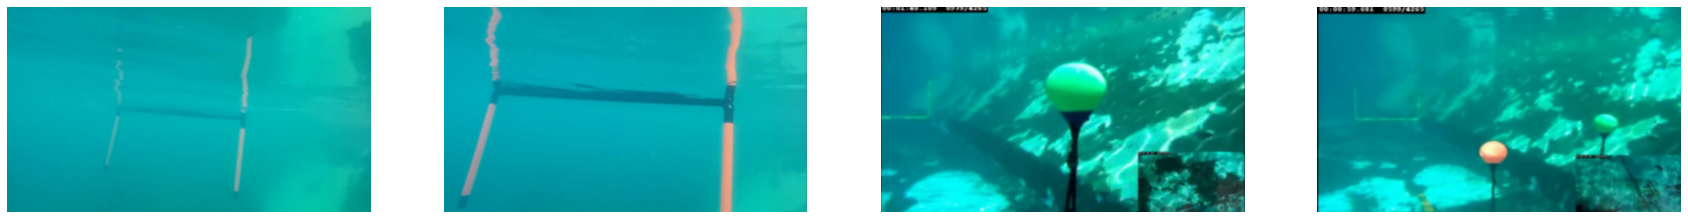

In [5]:
gate_image_names = ['gate1', 'gate2']
notgate_image_names = ['notgate1', 'notgate2']
images = gate_image_names + notgate_image_names
images = [read_image(image+'.png') for image in images]

show_images(images)

# NOISE TYPE 1

## S&P NOISE

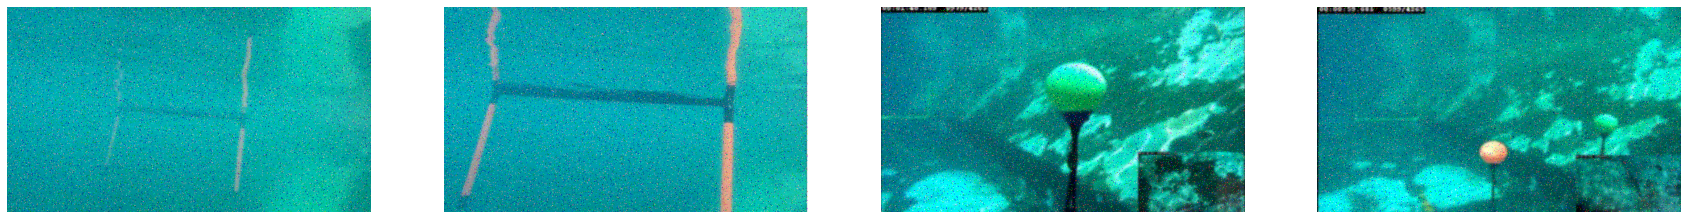

In [ ]:
s_p_images = [np.array(random_noise(image, mode = 's&p')*255, dtype = np.uint8) for image in images]
show_images(s_p_images)

## PEPPER NOISE

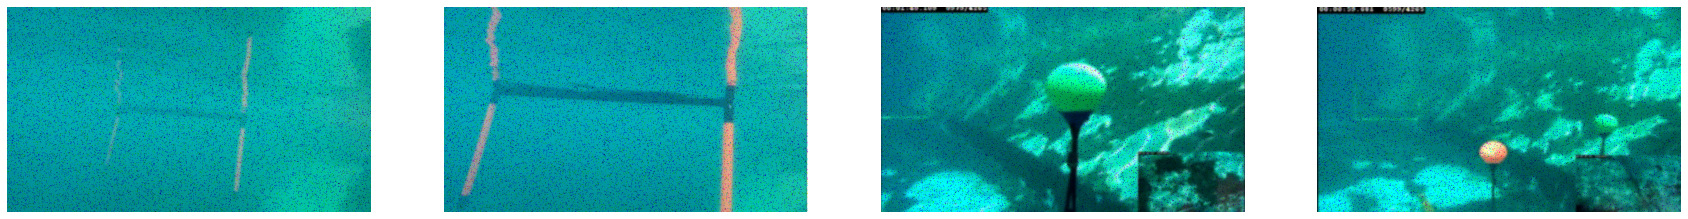

In [ ]:
pepper_noise = [np.array(random_noise(image, mode = 'pepper')*255, dtype = np.uint8) for image in images]
show_images(pepper_noise)

## SALT NOISE

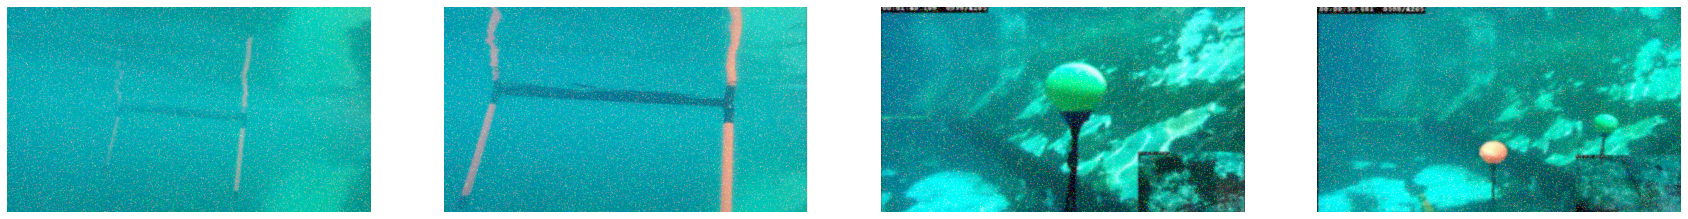

In [ ]:
salt_noise = [np.array(random_noise(image, mode = 'salt')*255, dtype = np.uint8) for image in images]
show_images(salt_noise)

## POISSON NOISE

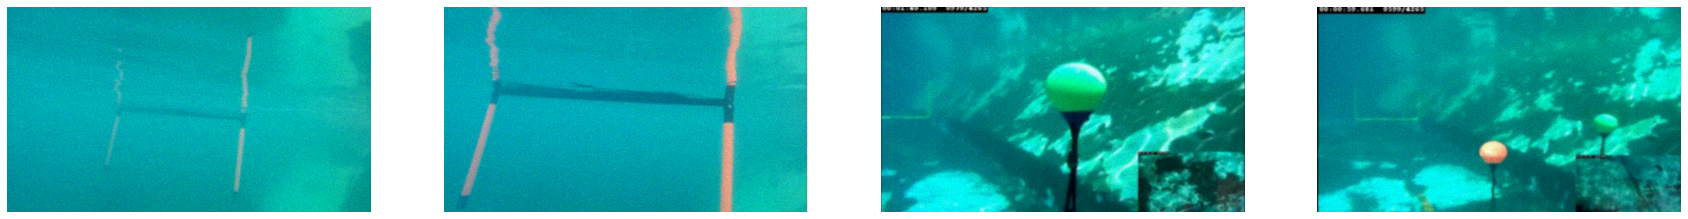

In [ ]:
poisson_images = [np.array(random_noise(image, mode = 'poisson')*255, dtype = np.uint8) for image in images]
show_images(poisson_images)

## GAUSSIAN NOISE

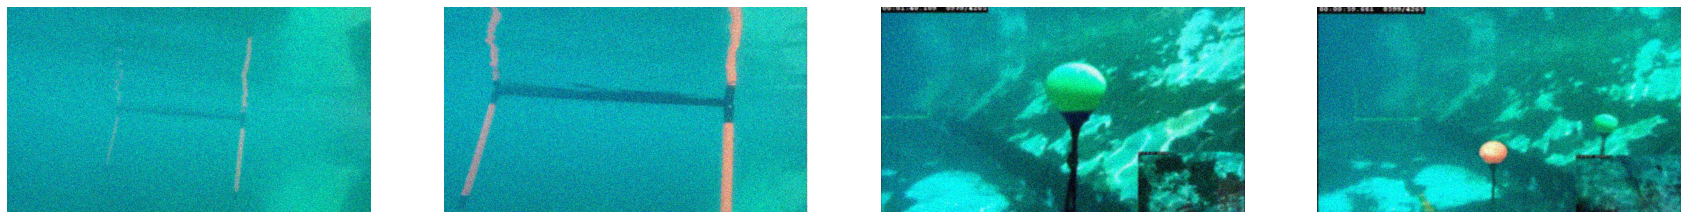

In [ ]:
gaussian_noise = [np.array(random_noise(image, mode = 'gaussian')*255, dtype = np.uint8) for image in images]
show_images(gaussian_noise)

## LOCALVAR

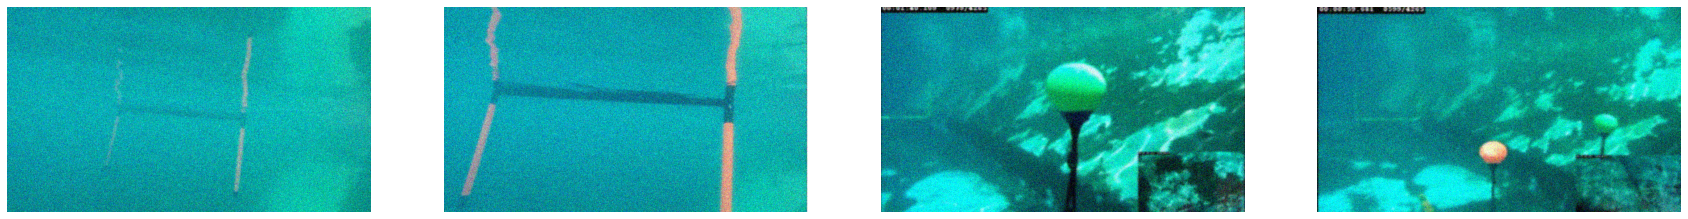

In [ ]:
localvar_noise = [np.array(random_noise(image, mode = 'localvar')*255, dtype = np.uint8) for image in images]
show_images(localvar_noise)

## SPECKLE

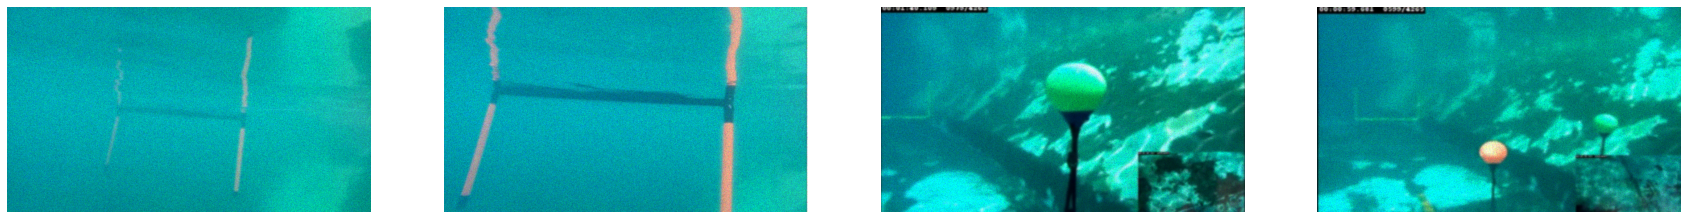

In [ ]:
speckle_noise = [np.array(random_noise(image, mode = 'speckle')*255, dtype = np.uint8) for image in images]
show_images(speckle_noise)

# NOISE TYPE 2

## Brighter

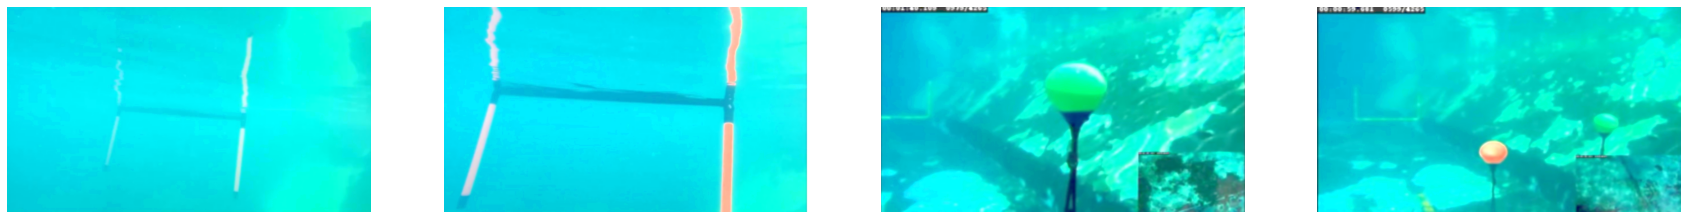

In [ ]:
bright_images = [adjust_brightness(image, value = 70) for image in images]
show_images(bright_images)

## Darker

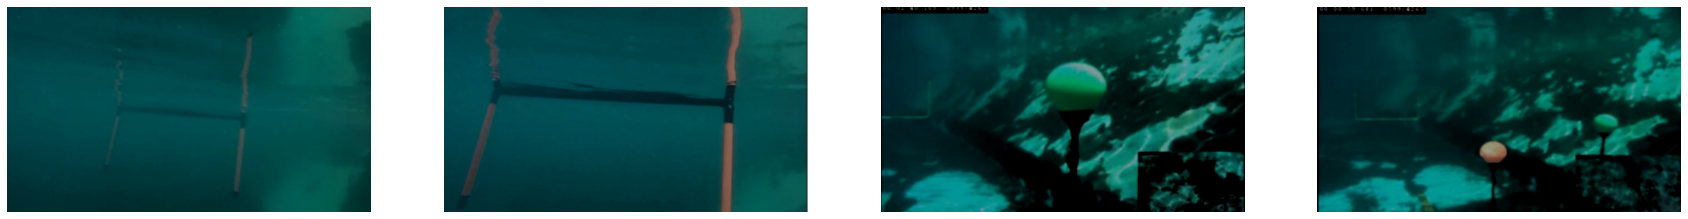

In [ ]:
dark_images = [adjust_brightness(image, value = -100) for image in images]
show_images(dark_images)

## Paler

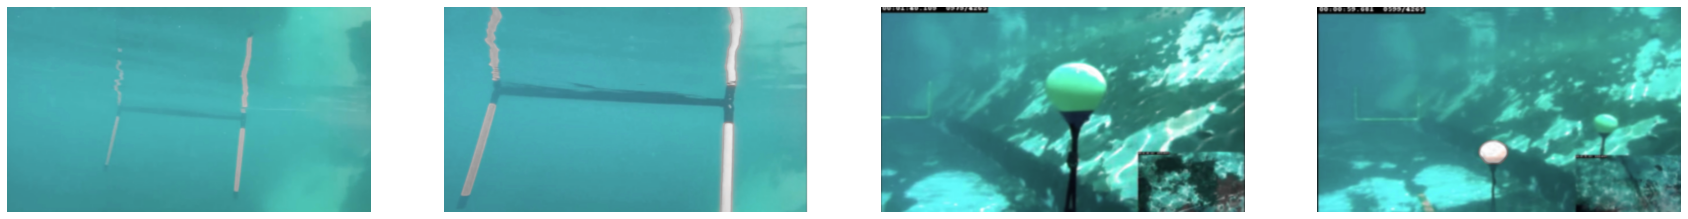

In [ ]:
paler_image = [adjust_paleness(image, value = -100) for image in images]
show_images(paler_image)

## Purer

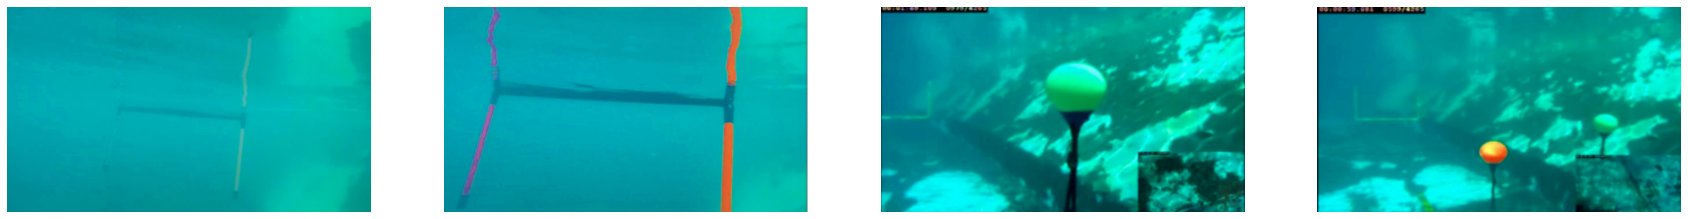

In [ ]:
purer_image = [adjust_paleness(image, value = 100) for image in images]
show_images(purer_image)

## Blured

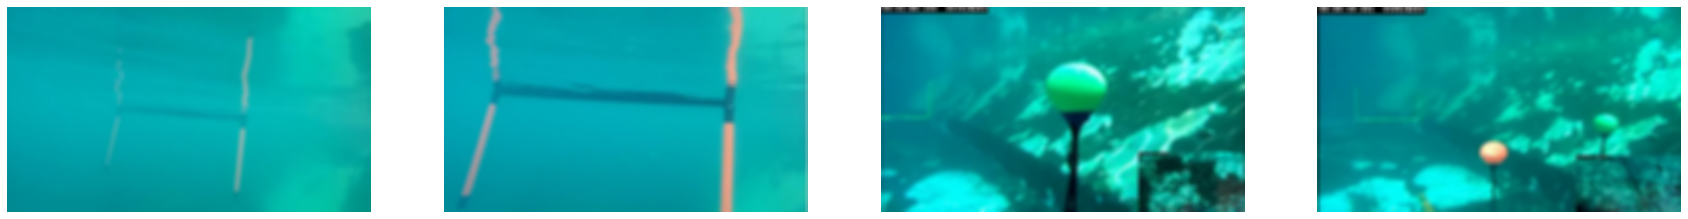

In [ ]:
blured_images = [blur(image, kernel_size= 10) for image in images]
show_images(blured_images)

# Test and save

In [95]:
save_to = '/content/drive/MyDrive/UAV/test_images'

In [54]:
modes1 = ['s&p',  'salt', 'pepper' ]
modes2 = ['gaussian', 'speckle']
modes3 = ['poisson','localvar']
noise_functions = [adjust_brightness, adjust_paleness, blur]
noise_function_names = ['bright', 'pale', 'blured']

In [83]:
noisy_images = [] 
noisy_names = []
for mode in modes1 :
  for i in np.arange(0.05, 0.4, 0.05):
    for image_id, image in enumerate(images):
      noisy_image = np.array(random_noise(image, mode = mode, amount = i) * 255, dtype = np.uint8)
      noisy_images.append(noisy_image)
      noisy_names.append(str(image_id) + '_'+ mode + '_'+ "{0:.2f}".format(i))


In [84]:
noisy_images2 = [] 
noisy_names2 = []
for mode in modes2 : 
  for m in np.arange(0.1, 1.1, 0.3):
    for s in np.arange(0.1, 1.1, 0.3):
      for image_id, image in enumerate(images):
        noisy_names2.append(str(image_id) + '_'+mode + '_' + "{0:.3f}".format(m) + '_' + "{0:.3f}".format(s))
        noisy_image = np.array(random_noise(image, mode = mode, mean = m, var = s)*255, dtype = np.uint8)
        noisy_images2.append(noisy_image)

In [85]:
noisy_images3 = [] 
noisy_names3 = [] 
values_cache = []
for func, name in zip(noise_functions, noise_function_names)  :
  for v in range(-100, 100, 10):
    for image_id, image in enumerate(images) : 
      values_cache = [] 
      try:
        if v in values_cache : # to not duplicate pale noise (since pale doesn't care about sign)
          continue 
        values_cache.append(v)
        noisy_image = func(image, v)
        noisy_images3.append(noisy_image)
        noisy_names3.append(str(image_id) + '_'+name + '_' + str(v))
      except:
        print(name, ' ', v)

blured   0
blured   0
blured   0
blured   0


In [ ]:
show_images(noisy_images3, labels = noisy_names3)

In [ ]:
noisy_names3

In [88]:

len(noisy_images), len(noisy_images2), len(noisy_images3)

(84, 128, 236)

In [89]:
total_noisy_images = noisy_images + noisy_images2 + noisy_images3
total_noisy_names = noisy_names + noisy_names2 + noisy_names3

len(total_noisy_images), len(total_noisy_names)

(448, 448)

In [92]:
src_dir = '/content/clear_and_noisy'

for image_name, image in zip(total_noisy_names, total_noisy_images):
  save_name = os.path.join(src_dir, image_name) + '.png'
  cv2.imwrite(save_name, image)

In [99]:
#save original images
for i, image in enumerate(images):
  save_name = os.path.join(src_dir, str(i)) + '.png'
  cv2.imwrite(save_name, image)

In [ ]:
!zip -r clear_and_noisy.zip clear_and_noisy

In [101]:

!cp clear_and_noisy.zip /content/drive/MyDrive/UAV/

In [102]:
len(os.listdir(src_dir))

452